<a href="https://colab.research.google.com/github/pmj-chosim/Commit-Project-2023.1.20-2023.2.28-/blob/main/2023.02.06/CV/3_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/2023W_CV_Boot

# Salt and Pepper Noise - #1

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def salt_and_pepper(image, prob):
  output = np.zeros(image.shape, np.uint8)
  thres = 1 - prob

  # 모든 픽셀에 대하여
  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
          # 0~1 난수 생성
          rdn = np.random.random()
          
          # 확률에 따라 검정색, 흰색, 원본 중 택1
          if rdn < prob: # 검정색
              output[i][j] = 0
          elif rdn > thres: # 흰색
              output[i][j] = 255
          else: # 원본
              output[i][j] = image[i][j]

  # 이미지 저장
  cv2.imwrite('images/salt_and_pepper.png', output)

  return output

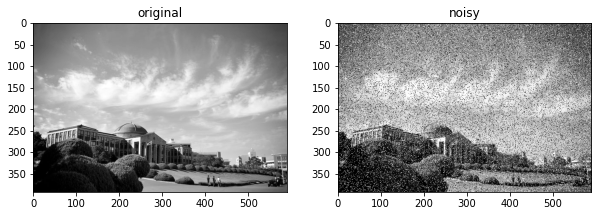

In [ ]:
# 이미지 파일명
filename = 'images/knuAB.jpg'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# Grayscale 영상으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 노이즈 생성
noisy_image = salt_and_pepper(image, 0.10)

# 원본 이미지 출력
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('original')

# 노이즈 이미지 출력
plt.subplot(1, 2, 2), plt.imshow(noisy_image, 'gray', vmin=0, vmax=255)
plt.title('noisy')
plt.show()

# Gaussian Noise - #2

In [ ]:
noise = np.random.random((5, 5))
noise

array([[0.75319941, 0.62483434, 0.35324696, 0.99265601, 0.52614063],
       [0.35853638, 0.22127305, 0.00761624, 0.48625189, 0.40956994],
       [0.95202583, 0.86224247, 0.21452908, 0.58249133, 0.86345117],
       [0.52160299, 0.54506001, 0.89042877, 0.98135302, 0.94267833],
       [0.17608412, 0.43743889, 0.32271076, 0.84372546, 0.51987262]])

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def gaussian_noise(image, sigma):
  # 가우시안 노이즈
  noise = np.random.random(image.shape) * sigma

  # 원본에 가우시안 노이즈 더하기
  output = cv2.add(image, noise, dtype=cv2.CV_64F)

  # 이미지 저장
  cv2.imwrite('images/gaussian_noise.png', output)
                
  return noise, output

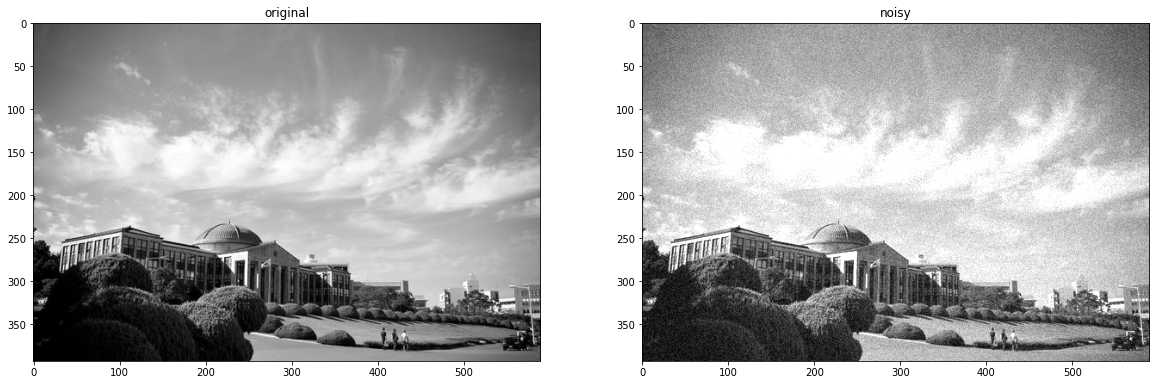

In [ ]:
# 이미지 파일명
filename = 'images/knuAB.jpg'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# Grayscale 영상으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 노이즈 생성
noise, noisy_image = gaussian_noise(image, 50)

# 원본 이미지 출력
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('original')

# 노이즈 이미지 출력
plt.subplot(1, 2, 2), plt.imshow(noisy_image, 'gray', vmin=0, vmax=255)
plt.title('noisy')

plt.show()

# Mean Filter - #3

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def mean_filter(image, ksize):
  # 입력 이미지와 동일한 크기의 출력 이미지 생성
  output = np.zeros_like(image)

  # 평균 필터 생성
  kernel = np.ones((ksize, ksize)) / (ksize*ksize)
  kcenter = ksize//2

  print(f'image: {image[:3, :3]}\n')
  print(f'kernel: {kernel}\n')

  # 입력 이미지의 픽셀에 대하여 반복
  for i in range(kcenter, image.shape[0]-kcenter):
    for j in range(kcenter, image.shape[1]-kcenter):
      sum = 0.0

      # 필터의 픽셀에 대하여 반복
      for k in range(ksize):
        for l in range(ksize):

          # 필터링 연산
          y, x = i + k - kcenter, j + l - kcenter
          sum += image[y, x] * kernel[k, l]
      
      # 출력 이미지 생성
      output[i][j] = sum

  return output

image: [[255 255 255]
 [253 253 253]
 [254 255 255]]

kernel: [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]



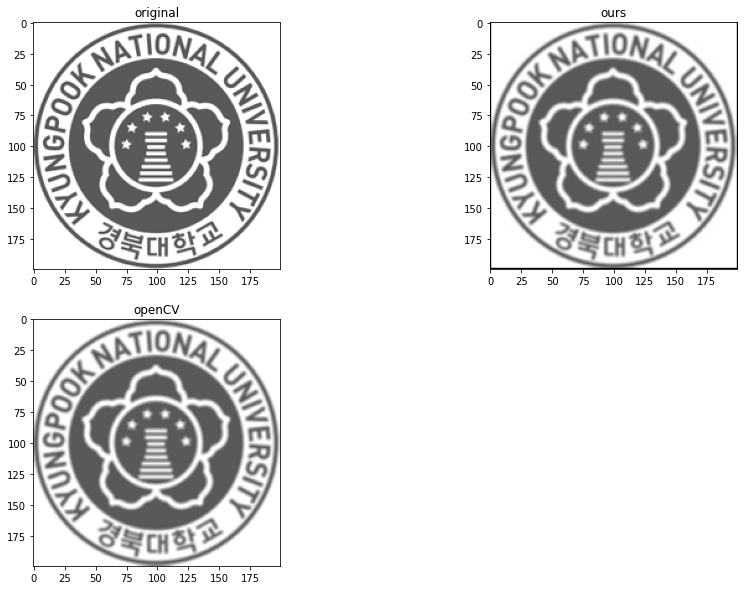

In [ ]:
# 이미지 파일명
filename = 'images/KNU.jpg'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# Grayscale 영상으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 직접 만든 평균 필터, opencv에서 제공하는 평균 필터
filtered = mean_filter(image, 3)
blur = cv2.blur(image, (3, 3))

# 원본 이미지 출력
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1), plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('original')

# 필터링된 이미지 출력
plt.subplot(2, 2, 2), plt.imshow(filtered, 'gray', vmin=0, vmax=255)
plt.title('ours')

# 블러링된 이미지 출력
plt.subplot(2, 2, 3), plt.imshow(blur, 'gray', vmin=0, vmax=255)
plt.title('openCV')

plt.show()

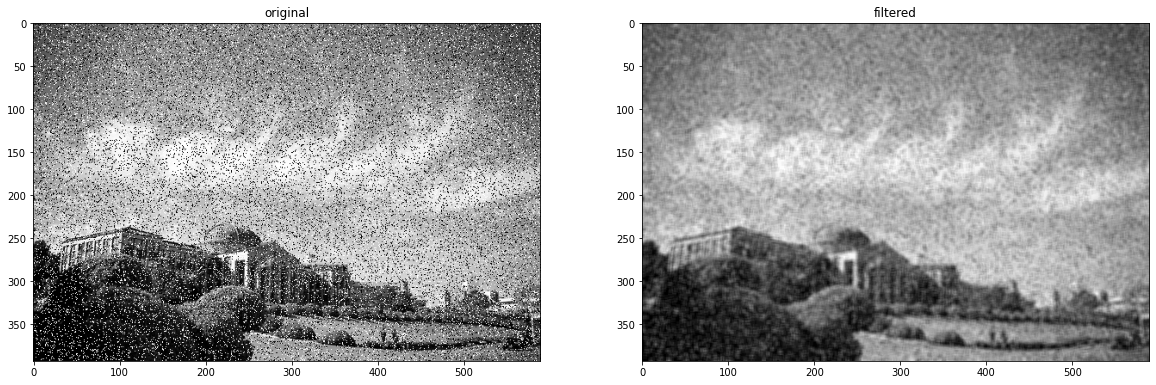

In [ ]:
# 이미지 파일명
filename = 'images/salt_and_pepper.png'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# Grayscale 영상으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 평균 필터 적용
filtered = cv2.blur(image, (5, 5))

# 원본 이미지 출력
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('original')

# 노이지 이미지 출력
plt.subplot(1, 2, 2), plt.imshow(filtered, 'gray', vmin=0, vmax=255)
plt.title('filtered')
plt.show()

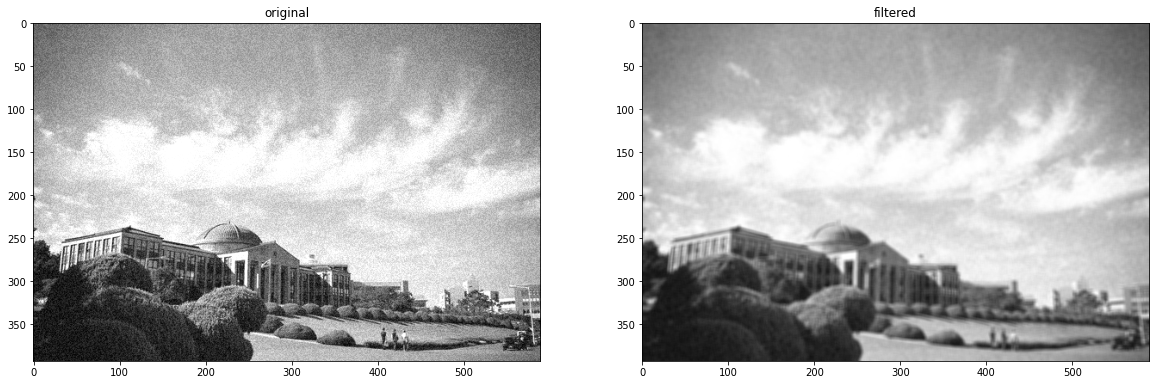

In [ ]:
# 이미지 파일명
filename = 'images/gaussian_noise.png'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# Grayscale 영상으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 평균 필터 적용
filtered = cv2.blur(image, (5, 5))

# 원본 이미지 출력
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('original')

# 노이지 이미지 출력
plt.subplot(1, 2, 2), plt.imshow(filtered, 'gray', vmin=0, vmax=255)
plt.title('filtered')
plt.show()

# Median Filter - #4

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

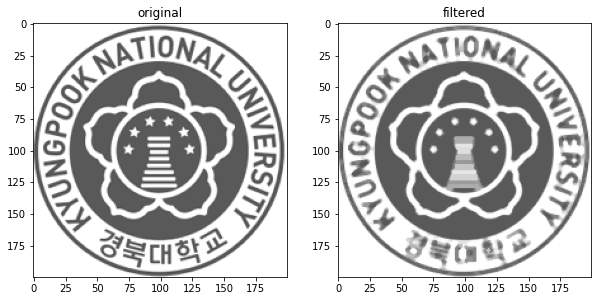

In [ ]:
# 이미지 파일명
filename = 'images/KNU.jpg'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# Grayscale 영상으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 중앙값 필터 적용
filtered = cv2.medianBlur(image, 5)

# 원본 이미지 출력
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('original')

# 노이지 이미지 출력
plt.subplot(1, 2, 2), plt.imshow(filtered, 'gray', vmin=0, vmax=255)
plt.title('filtered')
plt.show()

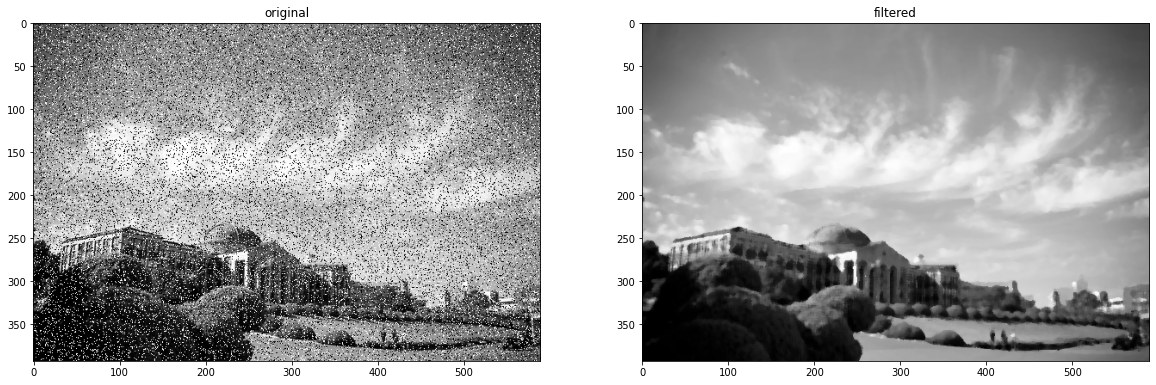

In [ ]:
# 이미지 파일명
filename = 'images/salt_and_pepper.png'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# Grayscale 영상으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 원본 이미지에 중앙값 필터 적용
filtered = cv2.medianBlur(image, 5)

# 원본 이미지 출력
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('original')

# 필터링된 이미지 출력
plt.subplot(1, 2, 2), plt.imshow(filtered, 'gray', vmin=0, vmax=255)
plt.title('filtered')
plt.show()

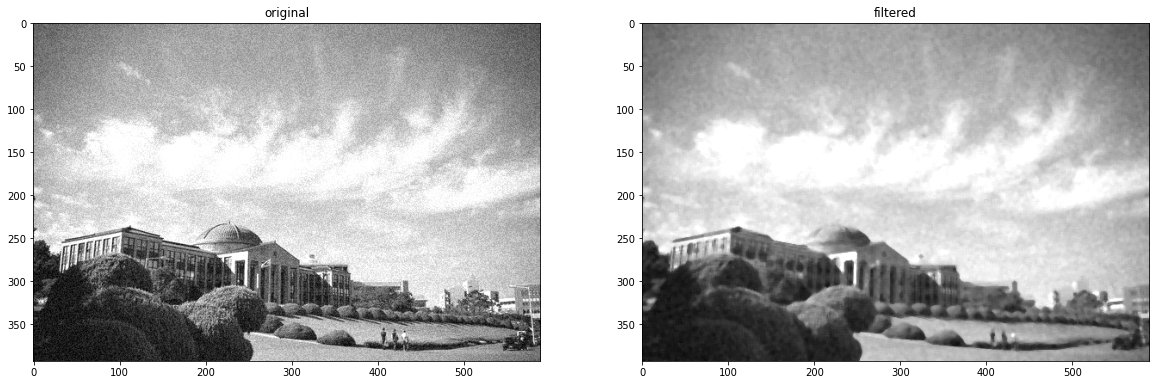

In [ ]:
# 이미지 파일명
filename = 'images/gaussian_noise.png'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# Grayscale 영상으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 원본 이미지에 중앙값 필터 적용
filtered = cv2.medianBlur(image, 5)

# 원본 이미지 출력
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('original')

# 필터링된 이미지 출력
plt.subplot(1, 2, 2), plt.imshow(filtered, 'gray', vmin=0, vmax=255)
plt.title('filtered')
plt.show()

# Gaussian Filter - #5

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

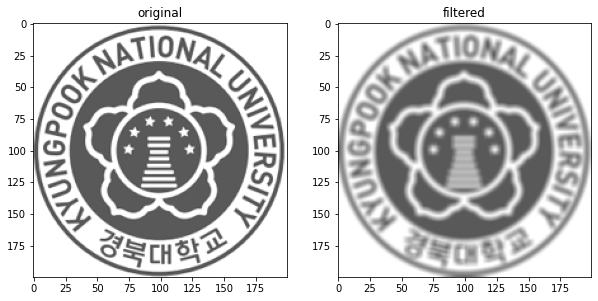

In [ ]:
# 이미지 파일명
filename = 'images/KNU.jpg'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# Grayscale 영상으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 원본 이미지에 가우시안 필터 적용
filtered = cv2.GaussianBlur(image, (5, 5), 50)

# 원본 이미지 출력
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('original')

# 필터링된 이미지 출력
plt.subplot(1, 2, 2), plt.imshow(filtered, 'gray', vmin=0, vmax=255)
plt.title('filtered')
plt.show()

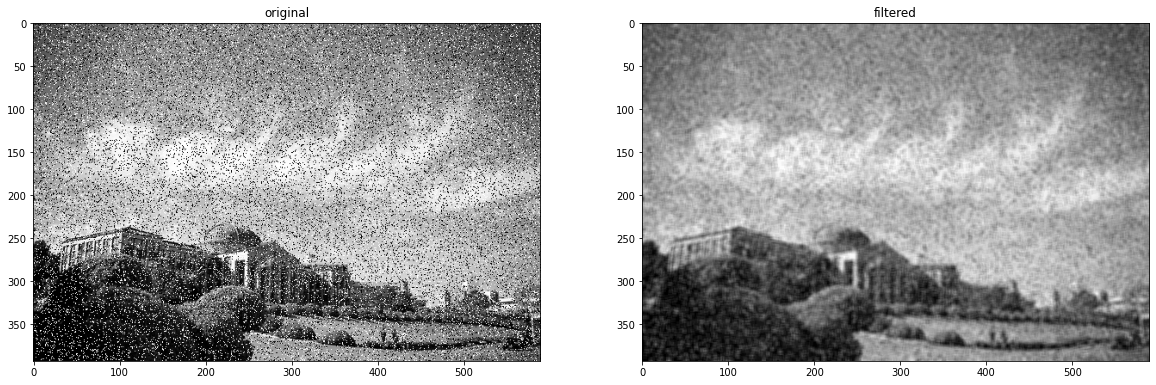

In [ ]:
# 이미지 파일명
filename = 'images/salt_and_pepper.png'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# Grayscale 영상으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 원본 이미지에 가우시안 필터 적용
filtered = cv2.GaussianBlur(image, (5,5), 50)

# 원본 이미지 출력
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('original')

# 필터링된 이미지 출력
plt.subplot(1, 2, 2), plt.imshow(filtered, 'gray', vmin=0, vmax=255)
plt.title('filtered')
plt.show()

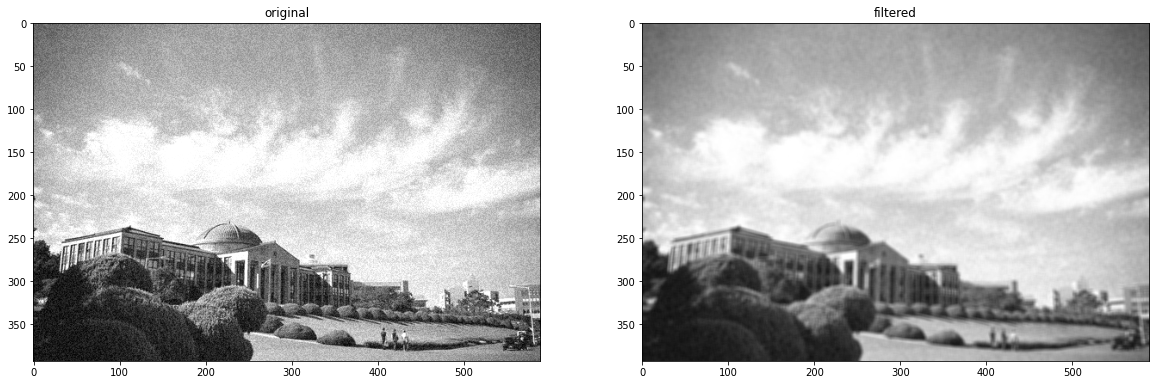

In [ ]:
# 이미지 파일명
filename = 'images/gaussian_noise.png'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# Grayscale 영상으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 원본 이미지에 가우시안 필터 적용
filtered = cv2.GaussianBlur(image, (5,5), 50)

# 원본 이미지 출력
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('original')

# 필터링된 이미지 출력
plt.subplot(1, 2, 2), plt.imshow(filtered, 'gray', vmin=0, vmax=255)
plt.title('filtered')
plt.show()

# Sharpening - #6

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def sharpening(image):
  kernel1 = np.array([[0, -1, 0],
             [-1, 5, -1],
             [0, -1, 0]])

  kernel2 = np.array([[-2, -2, -2],
             [-2, 17, -2],
             [-2, -2, -2]])

  dst1 = cv2.filter2D(image, -1, kernel1)
  dst2 = cv2.filter2D(image, -1, kernel2)

  return dst1, dst2

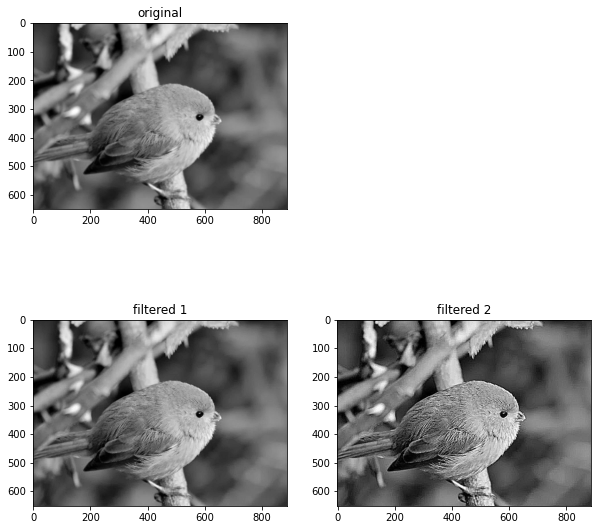

In [ ]:
# 이미지 파일명
filename = 'images/새.png'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# Grayscale 영상으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 원본 이미지에 샤프닝 적용
dst1, dst2 = sharpening(image)

# 원본 이미지 출력
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(image, 'gray')
plt.title('original')

# 필터링된 이미지 출력
plt.subplot(2, 2, 3), plt.imshow(dst1, 'gray')
plt.title('filtered 1')
plt.subplot(2, 2, 4), plt.imshow(dst2, 'gray')
plt.title('filtered 2')
plt.show()

# Unsharp Mask - #7

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def unsharp_mask(image, alpha):
  # 이미지 블러링
  blur = cv2.blur(image, (5, 5))
  
  # 디테일 추출
  detail = cv2.subtract(image, blur)
  
  # 이미지 더하기
  output = cv2.addWeighted(image, 1, detail, alpha, 0)

  return output

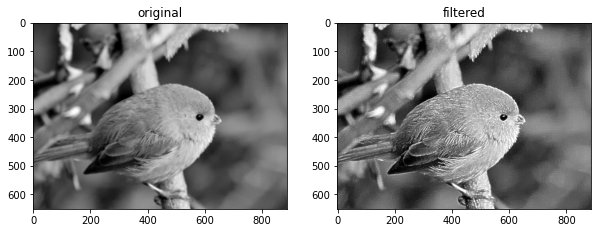

In [ ]:
# 이미지 파일명
filename = 'images/새.png'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# Grayscale 영상으로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 원본 이미지에 언샤프 마스킹 적용
filtered = unsharp_mask(image, 10)

# 원본 이미지 출력
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(image, 'gray')
plt.title('original')

# 필터링된 이미지 출력
plt.subplot(1, 2, 2), plt.imshow(filtered, 'gray')
plt.title('filtered')
plt.show()